In [98]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

In [99]:
boston =load_boston()
df = pd.DataFrame(boston.data)

In [100]:
df.columns = boston.feature_names
df['MEDV'] = boston.target #MEDV meadian value

In [101]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
df.shape

(506, 14)

In [119]:
X=df.iloc[:,0:13]
Y = df.iloc[:,-1]

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [121]:
clf=DecisionTreeRegressor(criterion='mse',max_depth=2)
clf.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=2)

In [122]:
ypred = clf.predict(xtest)

In [123]:
r2_score(ytest,ypred)

0.6758436094969433

[Text(167.4, 181.2, 'X[5] <= 6.941\nmse = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(83.7, 108.72, 'X[12] <= 14.4\nmse = 41.295\nsamples = 292\nvalue = 20.084'),
 Text(41.85, 36.23999999999998, 'mse = 26.114\nsamples = 178\nvalue = 23.47'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 19.151\nsamples = 114\nvalue = 14.797'),
 Text(251.10000000000002, 108.72, 'X[5] <= 7.437\nmse = 76.221\nsamples = 62\nvalue = 36.824'),
 Text(209.25, 36.23999999999998, 'mse = 39.454\nsamples = 39\nvalue = 32.241'),
 Text(292.95, 36.23999999999998, 'mse = 42.551\nsamples = 23\nvalue = 44.596')]

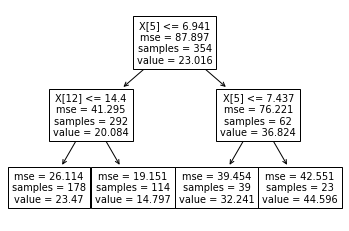

In [124]:
plot_tree(clf)

### Hyperparameter

In [125]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [126]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,)

In [127]:
reg.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [128]:
reg.best_score_

0.6448084971606904

In [129]:
reg.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.25}

#### Feature Importance

In [130]:
for importance, name in sorted(zip(clf.feature_importances_, xtrain.columns),reverse=True):
    print (name, importance)

RM 0.7598836166773639
LSTAT 0.2401163833226361
ZN 0.0
TAX 0.0
RAD 0.0
PTRATIO 0.0
NOX 0.0
INDUS 0.0
DIS 0.0
CRIM 0.0
CHAS 0.0
B 0.0
AGE 0.0
